## Análise exploratória de dados
###### Dados disponíveis em: [Wine Review Dataset](https://www.kaggle.com/datasets/zynicide/wine-reviews?select=winemag-data-130k-v2.csv).

----

## Perguntas a serem respondidas:

- **De qual país vem o melhor vinho?**
- **Existe relação entre o preço do vinho com qualidade?**
- **Existem tipos de uva de maior qualidade?**
- **Qual o melhor vinho em cada faixa de preço?**

## Conhecendo os dados sobre os vinhos

#### Tabela de classificação por pontos

- **98 - 100** - Clássico
- **94 - 87** - Soberbo
- **90 - 93** - Excelente
- **87 - 89** - Muito bom
- **83 - 86** - Bom
- **80 - 82** - Aceitável

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
df_wine = pd.read_csv('wine.csv')


In [8]:
df_wine.info()

# Conferindo se há colunas com dados ausentes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [9]:
df_wine.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [10]:
# Quantidade de vinhos avaliados por país

df_wine.value_counts('country')

,count
country,
US,54504
France,22093
Italy,19540
Spain,6645
Portugal,5691
Chile,4472
Argentina,3800
Austria,3345
Australia,2329


In [11]:
# Tipo de uva mais utilizadas no processo de fabricação dos vinhos avaliados

df_wine.value_counts('variety')

,count
variety,
Pinot Noir,13272
Chardonnay,11753
Cabernet Sauvignon,9472
Red Blend,8946
Bordeaux-style Red Blend,6915
...,...
Tempranillo-Malbec,1
Malbec-Carménère,1
Malagouzia-Chardonnay,1


## Limpeza de Dados

In [12]:
# Criando um novo dataframe para exploração
df_wine1 = df_wine.copy()

In [13]:
# Exluindo colunas que não serão relevantes para a análise

df_wine1 = df_wine1.drop(["Unnamed: 0", "designation", "region_1", "region_2", "taster_name", "taster_twitter_handle"], axis=1)
df_wine1.head()

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [14]:
# Identificando quais as linhas contém valores nulos
df_wine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


In [15]:
# Cálculo de proporção dos dados ausentes para entender se a remoção dos dados pode interferir na análise

print("{:.0%}".format(df_wine1["price"].count() / df_wine1.shape[0]))

93%


In [16]:
# Visto que o dataset tem um volume considerável de dados, apesar dos valores nulos, optarei por remover os valores nulos

df_wine1 = df_wine1.dropna(subset=["country", "price", "variety"])
df_wine1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


## Análise Exploratória

Text(0, 0.5, 'Frequência')

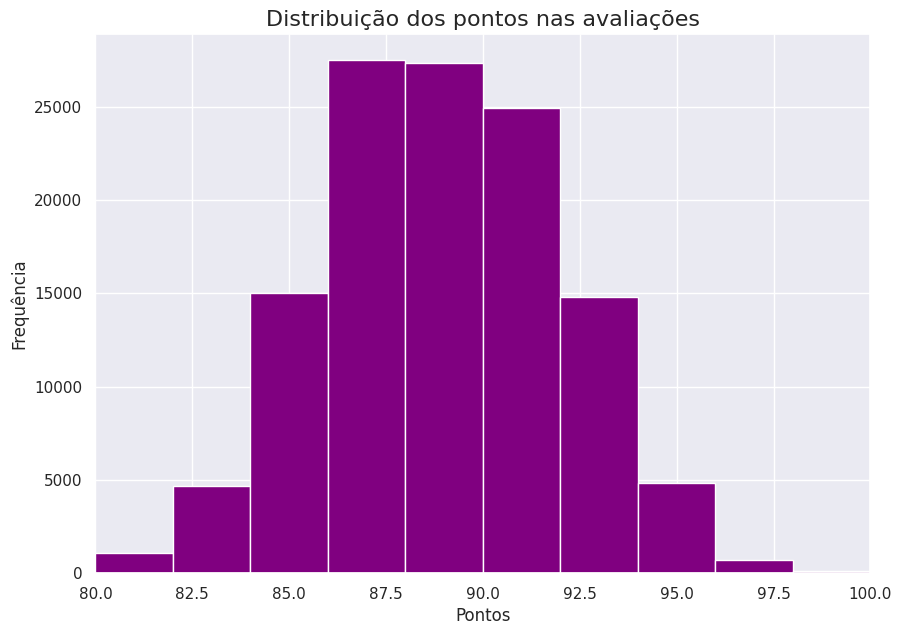

In [17]:
# Analisando a distribuição de pontos nas avaliações

plt.figure(figsize=(10, 7))
plt.hist(data=df_wine1, x="points",
         bins=10,
         color="purple")
plt.xlim(80, 100)
plt.title("Distribuição dos pontos nas avaliações", fontsize=16)
plt.xlabel("Pontos")
plt.ylabel("Frequência")

In [18]:
# Top 10 uvas com melhor média na avaliação

numeric_cols = df_wine1.select_dtypes(include=['number'])
melhor_qualidade_uvas = numeric_cols.groupby(df_wine1['variety']).mean()
melhor_qualidade_uvas = melhor_qualidade_uvas.sort_values(by="points", ascending=False)[:10]
melhor_qualidade_uvas.style.background_gradient(cmap='Purples',high=0.5, subset=["points"])



,points,price
variety,,
Terrantez,95.000000,236.000000
Gelber Traminer,95.000000,35.000000
Tinta del Pais,95.000000,47.500000
Bual,94.333333,100.000000
Sercial,94.000000,50.000000
Riesling-Chardonnay,94.000000,40.000000
Garnacha-Cariñena,93.000000,57.000000
Roviello,93.000000,28.000000
Blauburgunder,93.000000,19.000000


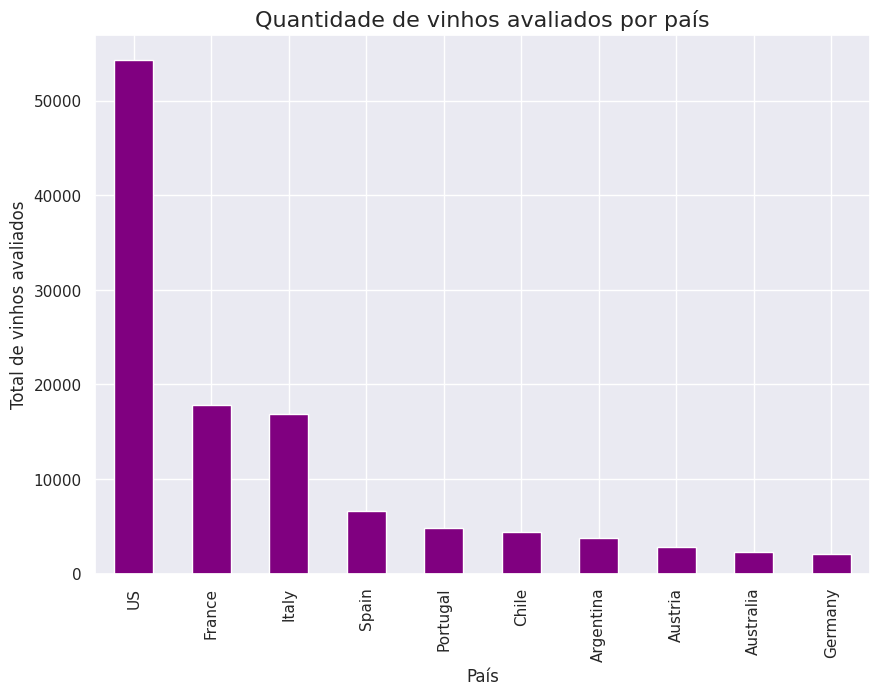

In [19]:
# Quantidade de vinhos avaliados por país

vinhos_top_10 = df_wine1.value_counts('country')[:10]
vinhos_top_10

plt.figure(figsize=(10, 7))
vinhos_top_10.plot(kind="bar", color="purple")
plt.title("Quantidade de vinhos avaliados por país", fontsize=16)
plt.xlabel("País")
plt.ylabel("Total de vinhos avaliados");

<ipython-input-20-c4e53f604bfd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=preco_medio['price'], y=preco_medio.index, palette="Purples_r")


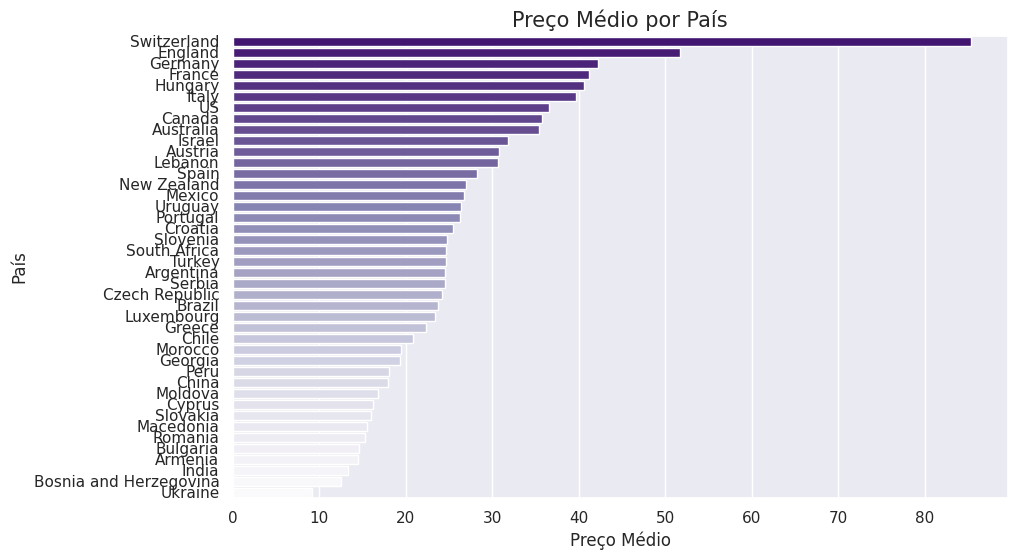

In [20]:
# Preço médio de vinhos por país

numeric_cols2 = df_wine1.select_dtypes(include=['number'])
preco_medio = numeric_cols2.groupby(df_wine1['country']).mean()
preco_medio = preco_medio[['price']].sort_values(by="price", ascending=False)
preco_medio

plt.figure(figsize=(10, 6))
sns.barplot(x=preco_medio['price'], y=preco_medio.index, palette="Purples_r")
plt.title('Preço Médio por País', fontsize=15)
plt.xlabel('Preço Médio')
plt.ylabel('País')
plt.show()

In [21]:
# Vinhos mais caros por país
vinhos_mais_caros = df_wine1.groupby(['country', 'title'])['price'].max().reset_index()
vinhos_mais_caros = vinhos_mais_caros.sort_values(by=['country', 'price'], ascending=[True, False])
vinhos_mais_caros_top = vinhos_mais_caros.groupby('country').head(1)
vinhos_mais_caros_top.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])

,country,title,price
3330,Argentina,Viña Cobos 2012 Volturno Marchiori Vineyard Cabernet Sauvignon (Perdriel),230.000000
3501,Armenia,Van Ardi 2015 Estate Bottled Rosé (Armenia),15.000000
4805,Australia,Penfolds 2008 Grange Shiraz (South Australia),850.000000
6039,Austria,Emmerich Knoll 2013 Ried Loibenberg Smaragd Grüner Veltliner (Wachau),1100.000000
8184,Bosnia and Herzegovina,Winery Čitluk 2007 Vranac Vranec (Mostar),13.000000
8187,Brazil,Casa Perini 2012 Quatro Red (Vale Trentino),60.000000
8311,Bulgaria,Midalidare 2012 Reserve Red (Thracian Valley),100.000000
8487,Canada,Mission Hill 2011 Oculus Red (Okanagan Valley),120.000000
9892,Chile,Errazuriz 2010 Viñedo Chadwick Red (Maipo Valley),400.000000
12709,China,Chateau Changyu-Castel 2009 Noble Dragon Red (China),18.000000


In [22]:
# Qual país tem a melhor média das avaliações?

numeric_cols = df_wine1.select_dtypes(include=['number'])
melhor_qualidade = numeric_cols.groupby(df_wine1['country']).mean()
melhor_qualidade = melhor_qualidade.sort_values(by="points", ascending=False)[:10]
melhor_qualidade.style.background_gradient(cmap='Purples',high=0.5, subset=["points"])

,points,price
country,,
England,91.550725,51.681159
India,90.222222,13.333333
Austria,90.190782,30.762772
Germany,89.836321,42.257547
Canada,89.377953,35.712598
Hungary,89.165517,40.648276
China,89.000000,18.000000
France,88.734867,41.139120
Luxembourg,88.666667,23.333333


In [23]:
# E qual tem a pior média das avaliações?

numeric_cols = df_wine1.select_dtypes(include=['number'])
melhor_qualidade = numeric_cols.groupby(df_wine1['country']).mean()
melhor_qualidade = melhor_qualidade.sort_values(by="points", ascending=True)[:10]
melhor_qualidade.style.background_gradient(cmap='Purples',high=0.5, subset=["points"])

,points,price
country,,
Peru,83.562500,18.062500
Ukraine,84.071429,9.214286
Brazil,84.659574,23.765957
Mexico,85.257143,26.785714
Romania,86.400000,15.241667
Chile,86.495130,20.787316
Bosnia and Herzegovina,86.500000,12.500000
Argentina,86.710330,24.510117
Uruguay,86.752294,26.403670


In [24]:
# Qual vinícula tem melhor média avaliação?

vinicolas_com_media = df_wine1.groupby('winery')['points'].mean().reset_index()
vinicolas_com_media = vinicolas_com_media.sort_values(by='points', ascending=False)
vinicolas_com_media.head(10)

,winery,points
4512,Clos de Tart,98.0
623,Araujo,98.0
11168,Ovid,97.0
7235,Gandona,97.0
3013,Château Cheval Blanc,97.0
3936,Château d'Yquem,97.0
2831,Château Angélus,97.0
8288,J.L. Chave,97.0
12824,Salon,96.8
14051,Tenuta dell'Ornellaia,96.7


In [25]:
# Qual pessoa avaliou mais vinhos?

avaliadores_contagem = df_wine['taster_name'].value_counts().reset_index()
avaliadores_contagem.columns = ['taster_name', 'num_avaliacoes']
avaliadores_contagem = avaliadores_contagem.sort_values(by='num_avaliacoes', ascending=False)
avaliadores_contagem.head(10)

,taster_name,num_avaliacoes
0,Roger Voss,25514
1,Michael Schachner,15134
2,Kerin O’Keefe,10776
3,Virginie Boone,9537
4,Paul Gregutt,9532
5,Matt Kettmann,6332
6,Joe Czerwinski,5147
7,Sean P. Sullivan,4966
8,Anna Lee C. Iijima,4415
9,Jim Gordon,4177


## Qual melhor vinho em cada faixa de preço?

- Até 15 dólares
- Entre 15 e 30 dólares
- Entre 30 e 50 dólares
- Acima de 50 dólares

In [26]:
# Top 10 vinhos até 15 dólares
df2 = df_wine1.drop(["description", "province", "winery"], axis=1)
ate_15 = df2.query("price <= 15")
ate_15 = ate_15.sort_values(by="points", ascending=False)[:10]
ate_15.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,country,points,price,title,variety
19136,Spain,94,14.000000,Osborne NV Pedro Ximenez 1827 Sweet Sherry Sherry (Jerez),Sherry
23974,Portugal,94,13.000000,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red
12255,South Africa,93,15.000000,Simonsig 1998 Cabernet Sauvignon (Stellenbosch),Cabernet Sauvignon
129572,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
37882,Australia,93,15.000000,Marquis Philips 2000 Sarah's Blend Red (South Eastern Australia),Red Blend
74042,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
52776,US,93,14.000000,Uvaggio 2009 Vermentino (Lodi),Vermentino
43193,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier
9609,France,93,13.000000,Château Vincens 2011 Prestige Malbec-Merlot (Cahors),Malbec-Merlot
59823,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier


In [27]:
# Top 10 vinhos custando entre 15 e 30 dólares

entre_15_e_30 = df2.query("price > 15 and price <= 30")
entre_15_e_30 = entre_15_e_30.sort_values(by="points", ascending=False)[:10]
entre_15_e_30.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,country,points,price,title,variety
54311,Austria,96,28.000000,Eichinger 2014 Gaisberg Reserve Riesling (Kamptal),Riesling
81902,US,96,30.000000,Efeste 2009 Lola Chardonnay (Columbia Valley (WA)),Chardonnay
45992,France,96,28.000000,Château Filhot 2014 Sauternes,Bordeaux-style White Blend
102489,US,96,27.000000,The Eyrie Vineyards 2014 Estate Chardonnay (Dundee Hills),Chardonnay
119658,Spain,96,30.000000,Alvear NV Solera 1927 Pedro Ximénez (Montilla-Moriles),Pedro Ximénez
101580,US,96,20.000000,Rulo 2007 Syrah (Columbia Valley (WA)),Syrah
9901,France,96,29.000000,Domaines Schlumberger 2014 Saering Grand Cru Riesling (Alsace),Riesling
40309,Italy,96,27.000000,Isole e Olena 2010 Chianti Classico,Red Blend
109845,US,96,30.000000,Sineann 2015 TFL Pinot Noir (Willamette Valley),Pinot Noir
54253,US,96,27.000000,Donkey & Goat 2012 Grenache Noir Grenache (El Dorado),Grenache


In [28]:
# Top 10 vinhos custando entre 30 e 50

entre_30_50 = df2.query("price > 30 and price <= 50")
entre_30_50 = entre_30_50.sort_values(by="points", ascending=False)[:10]
entre_30_50.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,country,points,price,title,variety
118059,US,99,44.000000,Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast),Chardonnay
1560,US,98,50.000000,Pirouette 2008 Red Wine Red (Columbia Valley (WA)),Bordeaux-style Red Blend
47432,US,97,50.000000,Williams Selyem 2010 Allen Vineyard Chardonnay (Russian River Valley),Chardonnay
4504,US,97,50.000000,Limerick Lane 2013 Rocky Knoll Zinfandel (Russian River Valley),Zinfandel
114981,US,97,35.000000,Donkey & Goat 2010 Fenaughty Vineyard Syrah (El Dorado),Syrah
45986,France,97,45.000000,Château Coutet 2014 Barsac,Bordeaux-style White Blend
125831,US,97,50.000000,Dutton-Goldfield 2010 Dutton Ranch Rued Vineyard Chardonnay (Green Valley),Chardonnay
16524,Portugal,97,40.000000,Taylor Fladgate NV 325 Anniversary (Port),Port
128268,US,97,50.000000,Trefethen 2005 Estate Cabernet Sauvignon (Oak Knoll District),Cabernet Sauvignon
89730,France,97,50.000000,René Muré 2015 Clos Saint Landelin Vorbourg Grand Cru Riesling (Alsace),Riesling


In [29]:
# Top 10 vinhos custando acima de 50 dólares

acima_50 = df2.query("price > 50")
acima_50 = acima_50.sort_values(by="points", ascending=False)[:10]
acima_50.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,country,points,price,title,variety
113929,US,100,80.000000,Charles Smith 2006 Royal City Syrah (Columbia Valley (WA)),Syrah
111755,France,100,1500.000000,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend
89728,France,100,250.000000,Louis Roederer 2008 Cristal Vintage Brut (Champagne),Champagne Blend
123545,US,100,80.000000,Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA)),Syrah
118058,US,100,450.000000,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend
89729,France,100,617.000000,Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne),Chardonnay
45781,Italy,100,550.000000,Biondi Santi 2010 Riserva (Brunello di Montalcino),Sangiovese
111753,France,100,1500.000000,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend
111754,Italy,100,270.000000,Casanova di Neri 2007 Cerretalto (Brunello di Montalcino),Sangiovese Grosso
42197,Portugal,100,450.000000,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red
